In [9]:
import pandas as pd
from pylab import mpl, plt
import numpy as np
import datetime as dt
import yfinance as yf
import requests
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
msft = yf.Ticker('DOCU')
df = msft.history('5y')
df = df[['Close']]

lags = 5

cols = []

for lag in range(1, lags+1):
    col = 'lag_{}'.format(lag)
    df[col] = df['Close'].shift(lag)
    cols.append(col)

df.head()

In [5]:
df.dropna(inplace=True)

In [6]:
statmodels_reg = sm.OLS(df['Close'], df[cols]).fit()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


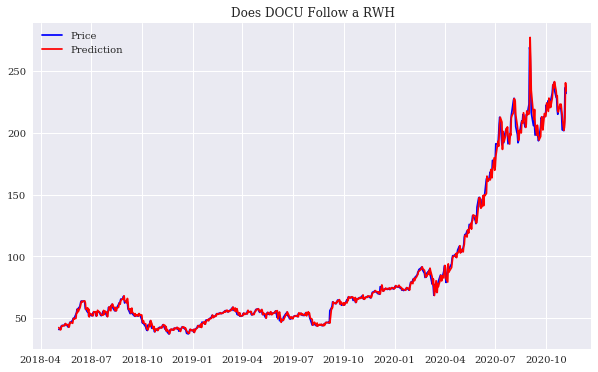

In [7]:
statmodels_reg = sm.OLS(df['Close'], df[cols]).fit()

df['Prediction'] = statmodels_reg.predict(df[cols])
#plot

fig, ax = plt.subplots(1, figsize=(10,6))

ax.plot(df.index, df['Close'], "-b", label='Price')
ax.plot(df.index, df['Prediction'], "-r", label='Prediction')
ax.set_title('Does DOCU Follow a RWH')
plt.legend(loc='upper left')

In [36]:
print(statmodels_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          9.205e+04
Date:                Sun, 08 Nov 2020   Prob (F-statistic):                        0.00
Time:                        13:08:56   Log-Likelihood:                         -1751.3
No. Observations:                 634   AIC:                                      3513.
Df Residuals:                     629   BIC:                                      3535.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
web_data = requests.get('https://en.wikipedia.org/wiki/NASDAQ-100#Changes_in_2020').text
#Put data into Pandas to easily create a list of tickers to loop through
nasdaq_df = pd.read_html(web_data)
#Finds the Wiki table with tickers and stores them in Pandas Data Frame
nasdaq_df = nasdaq_df[3]
#Creates a list of tickers from Data Frame to loop through
nasdaq_tickers = list(nasdaq_df['Ticker'])

In [71]:
lags = 5

cols = []

def prep_data(stock):
    tick = yf.Ticker(stock)
    df = tick.history('5y')
    df = df[['Close']]
    
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag)
        df[col] = df['Close'].shift(lag)
        cols.append(col)
    df.dropna(inplace=True)
    return df
    

In [72]:
def lin_reg(stock):
    df = prep_data(stock)
    model = sm.OLS(df['Close'], df[cols]).fit()
    r2 = model.rsquared_adj
    return r2

In [42]:
statmodels_reg.rsquared_adj

0.9986244161230842

In [76]:
r2 = map(lin_reg, nasdaq_tickers)

In [77]:
output = pd.DataFrame(r2, columns=['r_squared'], index=nasdaq_tickers)
output

,r_squared
ATVI,0.999539
ADBE,0.999488
AMD,0.998679
ALXN,0.999420
ALGN,0.998931
...,...
WBA,0.999730
WDAY,0.999373
XEL,0.999764
XLNX,0.999391


In [84]:
output['r_squared'].min()

0.9969821001354298